In [13]:
import pandas as pd
import numpy as np

In [16]:
!pip install nbimporter

In [22]:
import nbimporter
import imports

In [23]:
imports.create_cpi()

AttributeError: module 'imports' has no attribute 'create_cpi'

In [33]:
# idk why the import won't work but to save time I'll just put this here
def create_cpi():
    # gets CPI data
    path = 'CPIAUCSL.csv'
    df_CPI = pd.read_csv(path)
    
    BASE_YEAR =  308.742
    df_CPI['CPI_Multiplier'] =  BASE_YEAR / df_CPI['CPIAUCSL'].astype(int)
    df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])

    df_CPI['yr'] = df_CPI['DATE'].dt.year
    df_CPI['mo'] = df_CPI['DATE'].dt.month
    return df_CPI

In [34]:
cpi = create_cpi()

In [35]:
cpi.head()

,DATE,CPIAUCSL,CPI_Multiplier,yr,mo
0,1947-01-01,21.48,14.702000,1947,1
1,1947-02-01,21.62,14.702000,1947,2
2,1947-03-01,22.00,14.033727,1947,3
3,1947-04-01,22.00,14.033727,1947,4
4,1947-05-01,21.95,14.702000,1947,5


In [31]:
path = 'tornados_new.csv'
tornados = pd.read_csv(path)

In [32]:
tornados.head()

,yr,mo,dy,date,time,st,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1991,7,21,1991-07-21,15:40:00,SD,0,0,0,2000000.0,0.0,45.00,-102.87,0.00,0.00,0.1,23,0
1,1992,8,28,1992-08-28,15:00:00,MD,0,0,0,0.0,0.0,38.57,-75.95,0.00,0.00,0.1,10,0
2,1993,8,20,1993-08-20,15:40:00,NY,0,0,0,5000000.0,0.0,43.65,-76.10,0.00,0.00,0.2,13,0
3,1994,10,6,1994-10-06,17:10:00,MN,0,0,0,0.0,0.0,44.53,-96.25,44.53,-96.15,3.0,50,0
4,1995,8,2,1995-08-02,17:23:00,ND,0,0,0,0.0,0.0,46.73,-100.68,0.00,0.00,0.1,10,0


In [36]:
# combine dfs
cpi_adj = pd.merge(tornados, cpi, on=['yr', 'mo'], how='left')

In [38]:
# adds adjusted damage
cpi_adj['loss_adjusted'] = cpi_adj['loss'] * cpi_adj['CPI_Multiplier']

In [39]:
cpi_adj.head()

,yr,mo,dy,date,time,st,mag,inj,fat,loss,...,slon,elat,elon,len,wid,fc,DATE,CPIAUCSL,CPI_Multiplier,loss_adjusted
0,1991,7,21,1991-07-21,15:40:00,SD,0,0,0,2000000.0,...,-102.87,0.00,0.00,0.1,23,0,1991-07-01,136.2,2.270162,4.540324e+06
1,1992,8,28,1992-08-28,15:00:00,MD,0,0,0,0.0,...,-75.95,0.00,0.00,0.1,10,0,1992-08-01,140.8,2.205300,0.000000e+00
2,1993,8,20,1993-08-20,15:40:00,NY,0,0,0,5000000.0,...,-76.10,0.00,0.00,0.2,13,0,1993-08-01,144.8,2.144042,1.072021e+07
3,1994,10,6,1994-10-06,17:10:00,MN,0,0,0,0.0,...,-96.25,44.53,-96.15,3.0,50,0,1994-10-01,149.4,2.072094,0.000000e+00
4,1995,8,2,1995-08-02,17:23:00,ND,0,0,0,0.0,...,-100.68,0.00,0.00,0.1,10,0,1995-08-01,152.9,2.031197,0.000000e+00


In [40]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [43]:
# filter for Texas, Oklahoma, and Kansas in years 1995-2005
filtered = cpi_adj[cpi_adj['st'].isin(['TX','OK','KS'])]
filtered = filtered[cpi_adj['yr'].isin(list(range(1995,2005)))]

C:\Users\Thomas\AppData\Local\Temp\ipykernel_16336\3548486639.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered = filtered[cpi_adj['yr'].isin(list(range(1995,2005)))]


In [52]:
gbfilt = filtered.groupby('st')['loss_adjusted'].sum().reset_index()

In [58]:
states = ['TX','OK','KS']
years = ['1995','2005']

Text(0, 0.5, 'dollar loss, inflation adjusted for 8/24')

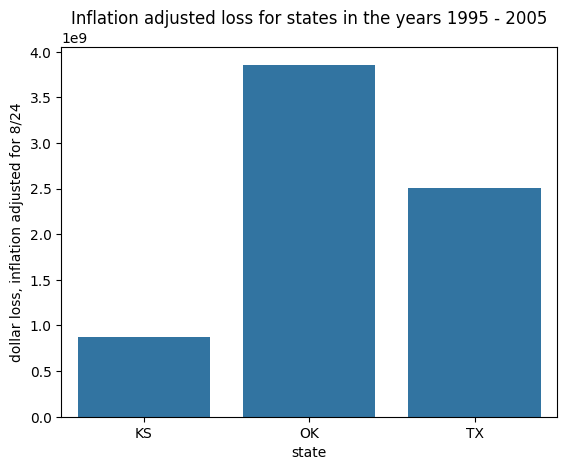

In [69]:
sns.barplot(data = gbfilt.iloc[0:10], x = 'st', y = 'loss_adjusted')
plt.title(f"Inflation adjusted loss for states in the years {years[0]} - {years[1]}")
plt.xlabel("state")
plt.ylabel("dollar loss, inflation adjusted for 8/24")

In [71]:
filtered.head()

,yr,mo,dy,date,time,st,mag,inj,fat,loss,...,slon,elat,elon,len,wid,fc,DATE,CPIAUCSL,CPI_Multiplier,loss_adjusted
11,2003,5,3,2003-05-03,19:12:00,TX,0,0,0,0.0,...,-99.57,33.00,-99.55,1.0,30,0,2003-05-01,182.9,1.696385,0.000000
12,2004,5,24,2004-05-24,18:25:00,KS,1,0,0,100000.0,...,-95.68,38.98,-95.68,1.2,75,0,2004-05-01,188.2,1.642245,164224.468085
25,1997,5,26,1997-05-26,19:00:00,OK,0,0,0,0.0,...,-96.00,35.25,-96.00,0.1,23,0,1997-05-01,159.9,1.941774,0.000000
29,2001,6,1,2001-06-01,14:56:00,KS,0,0,0,0.0,...,-99.22,37.97,-99.22,0.2,50,0,2001-06-01,177.7,1.744305,0.000000
30,2003,5,15,2003-05-15,19:42:00,TX,0,0,0,1000.0,...,-99.72,32.57,-99.72,0.3,20,0,2003-05-01,182.9,1.696385,1696.384615


In [73]:
gbfilt2 = filtered.groupby(['st', 'yr'])['loss_adjusted'].sum().reset_index()

Text(0, 0.5, 'dollar loss, inflation adjusted for 8/24')

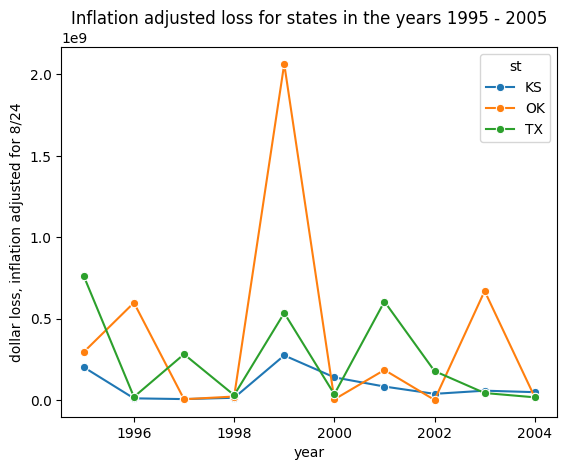

In [76]:
sns.lineplot(data=gbfilt2, x='yr', y='loss_adjusted', hue='st', marker='o')
plt.title(f"Inflation adjusted loss for states in the years {years[0]} - {years[1]}")
plt.xlabel("year")
plt.ylabel("dollar loss, inflation adjusted for 8/24")